UTS MACHINE LEARNING DENGAN DATA SHEET FAST FOOD MENGGUNAKAN K-MEANS




NAMA : RHEZA ILHAM FIRMANSYAH / 1103204033


Mengimpor pustaka pustaka yang diperlukan

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **EDA**

Membaca datasets yang sudah saya upload di data google colab


In [70]:
# Memanggil dan menampilkan data
dataset = "/content/fastfood.csv"
df = pd.read_csv(dataset)

# Menampilkan data
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


df salad digunakan untuk menghitung frekuensi kemunculan setiap nilai unik dalam kolom 'salad' dari DataFrame

In [71]:
df.salad.value_counts()

Other    515
Name: salad, dtype: int64

untuk menampilkan dimensi (jumlah baris dan kolom)


menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame df. isnull() menghasilkan DataFrame yang memiliki nilai True untuk setiap sel yang bernilai NaN (missing), dan kemudian sum() diaplikasikan untuk menghitung jumlah nilai True


In [53]:
# Shape of the Dataset
print(df.shape)
# check for the missing values
df.isnull().sum()

(515, 17)


restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

Menghapus kolom 'vit_a', 'vit_c', dan 'calcium' dari DataFrame df


Mengisi nilai yang hilang (NaN) dalam kolom 'fiber' dengan nilai rata-rata dari kolom tersebut.

In [54]:
df.drop(columns=['vit_a','vit_c','calcium'],inplace=True)

# Replace less missing value with there means
df.fiber.fillna(df.fiber.mean(),inplace=True)
df.protein.fillna(df.protein.mean(),inplace=True)

menghitung jumlah kemunculan setiap nilai unik dalam kolom 'restaurant' pada DataFrame df. Ini memberikan informasi tentang distribusi restoran-restoran yang ada dalam dataset.

In [55]:
df.restaurant.value_counts()

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

In [56]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        515 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      515 non-null    float64
 13  salad        515 non-null    object 
dtypes: float64(4), int64(7), object(3)
memory usage: 56.5+ KB


In [57]:
# Ringkasan statistik deskriptif
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.001794,6.761301,17.666710
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,25.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000


# **DATA VISUALISASI**

akan membuat boxplot untuk setiap kolom numerik dalam DataFrame df dengan orientasi horizontal (orient="h"). Boxplot ini memberikan gambaran
tentang sebaran nilai-nilai dalam setiap kolom, meliputi nilai median, kuartil, dan juga membantu dalam mendeteksi adanya pencilan (outliers) jika ada

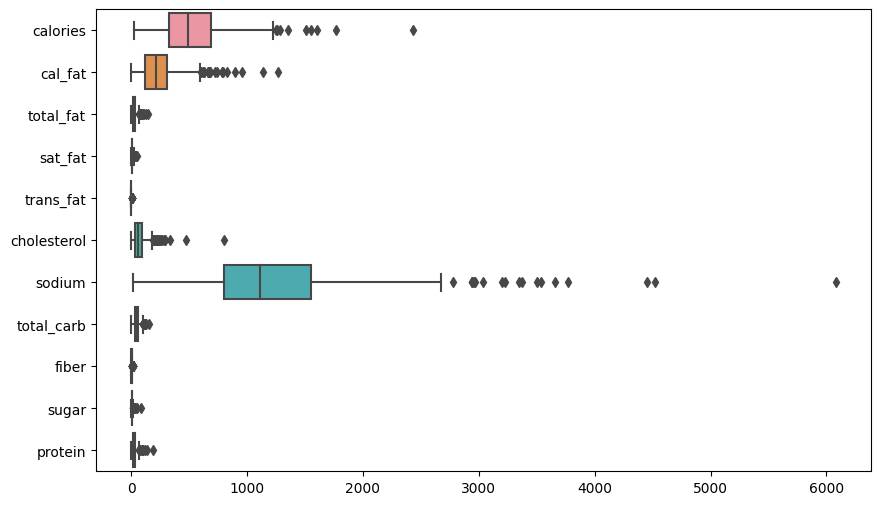

In [58]:
# Menampilkan data secara visual
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="h");

In [59]:
# Hapus kolom-kolom kategorikal sebelum menghitung korelasi
df_numeric = df.select_dtypes(include=['float64', 'int64'])


In [60]:
# Hapus baris dengan nilai null
df_numeric = df_numeric.dropna()


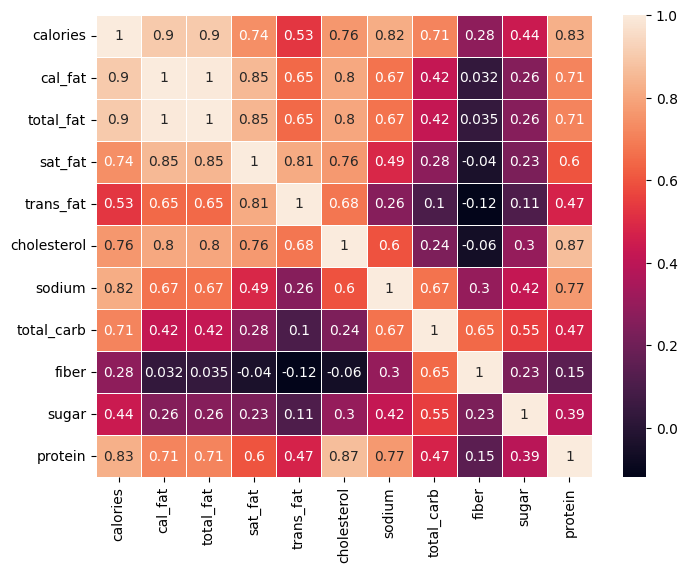

In [72]:
# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=0.5)
plt.show()


membuat pairplot, yang merupakan grid dari scatter plots antar kolom numerik dalam DataFrame. Pairplot membantu dalam memvisualisasikan hubungan antar variabel dan distribusi masing-masing variabel.

<Figure size 1000x500 with 0 Axes>

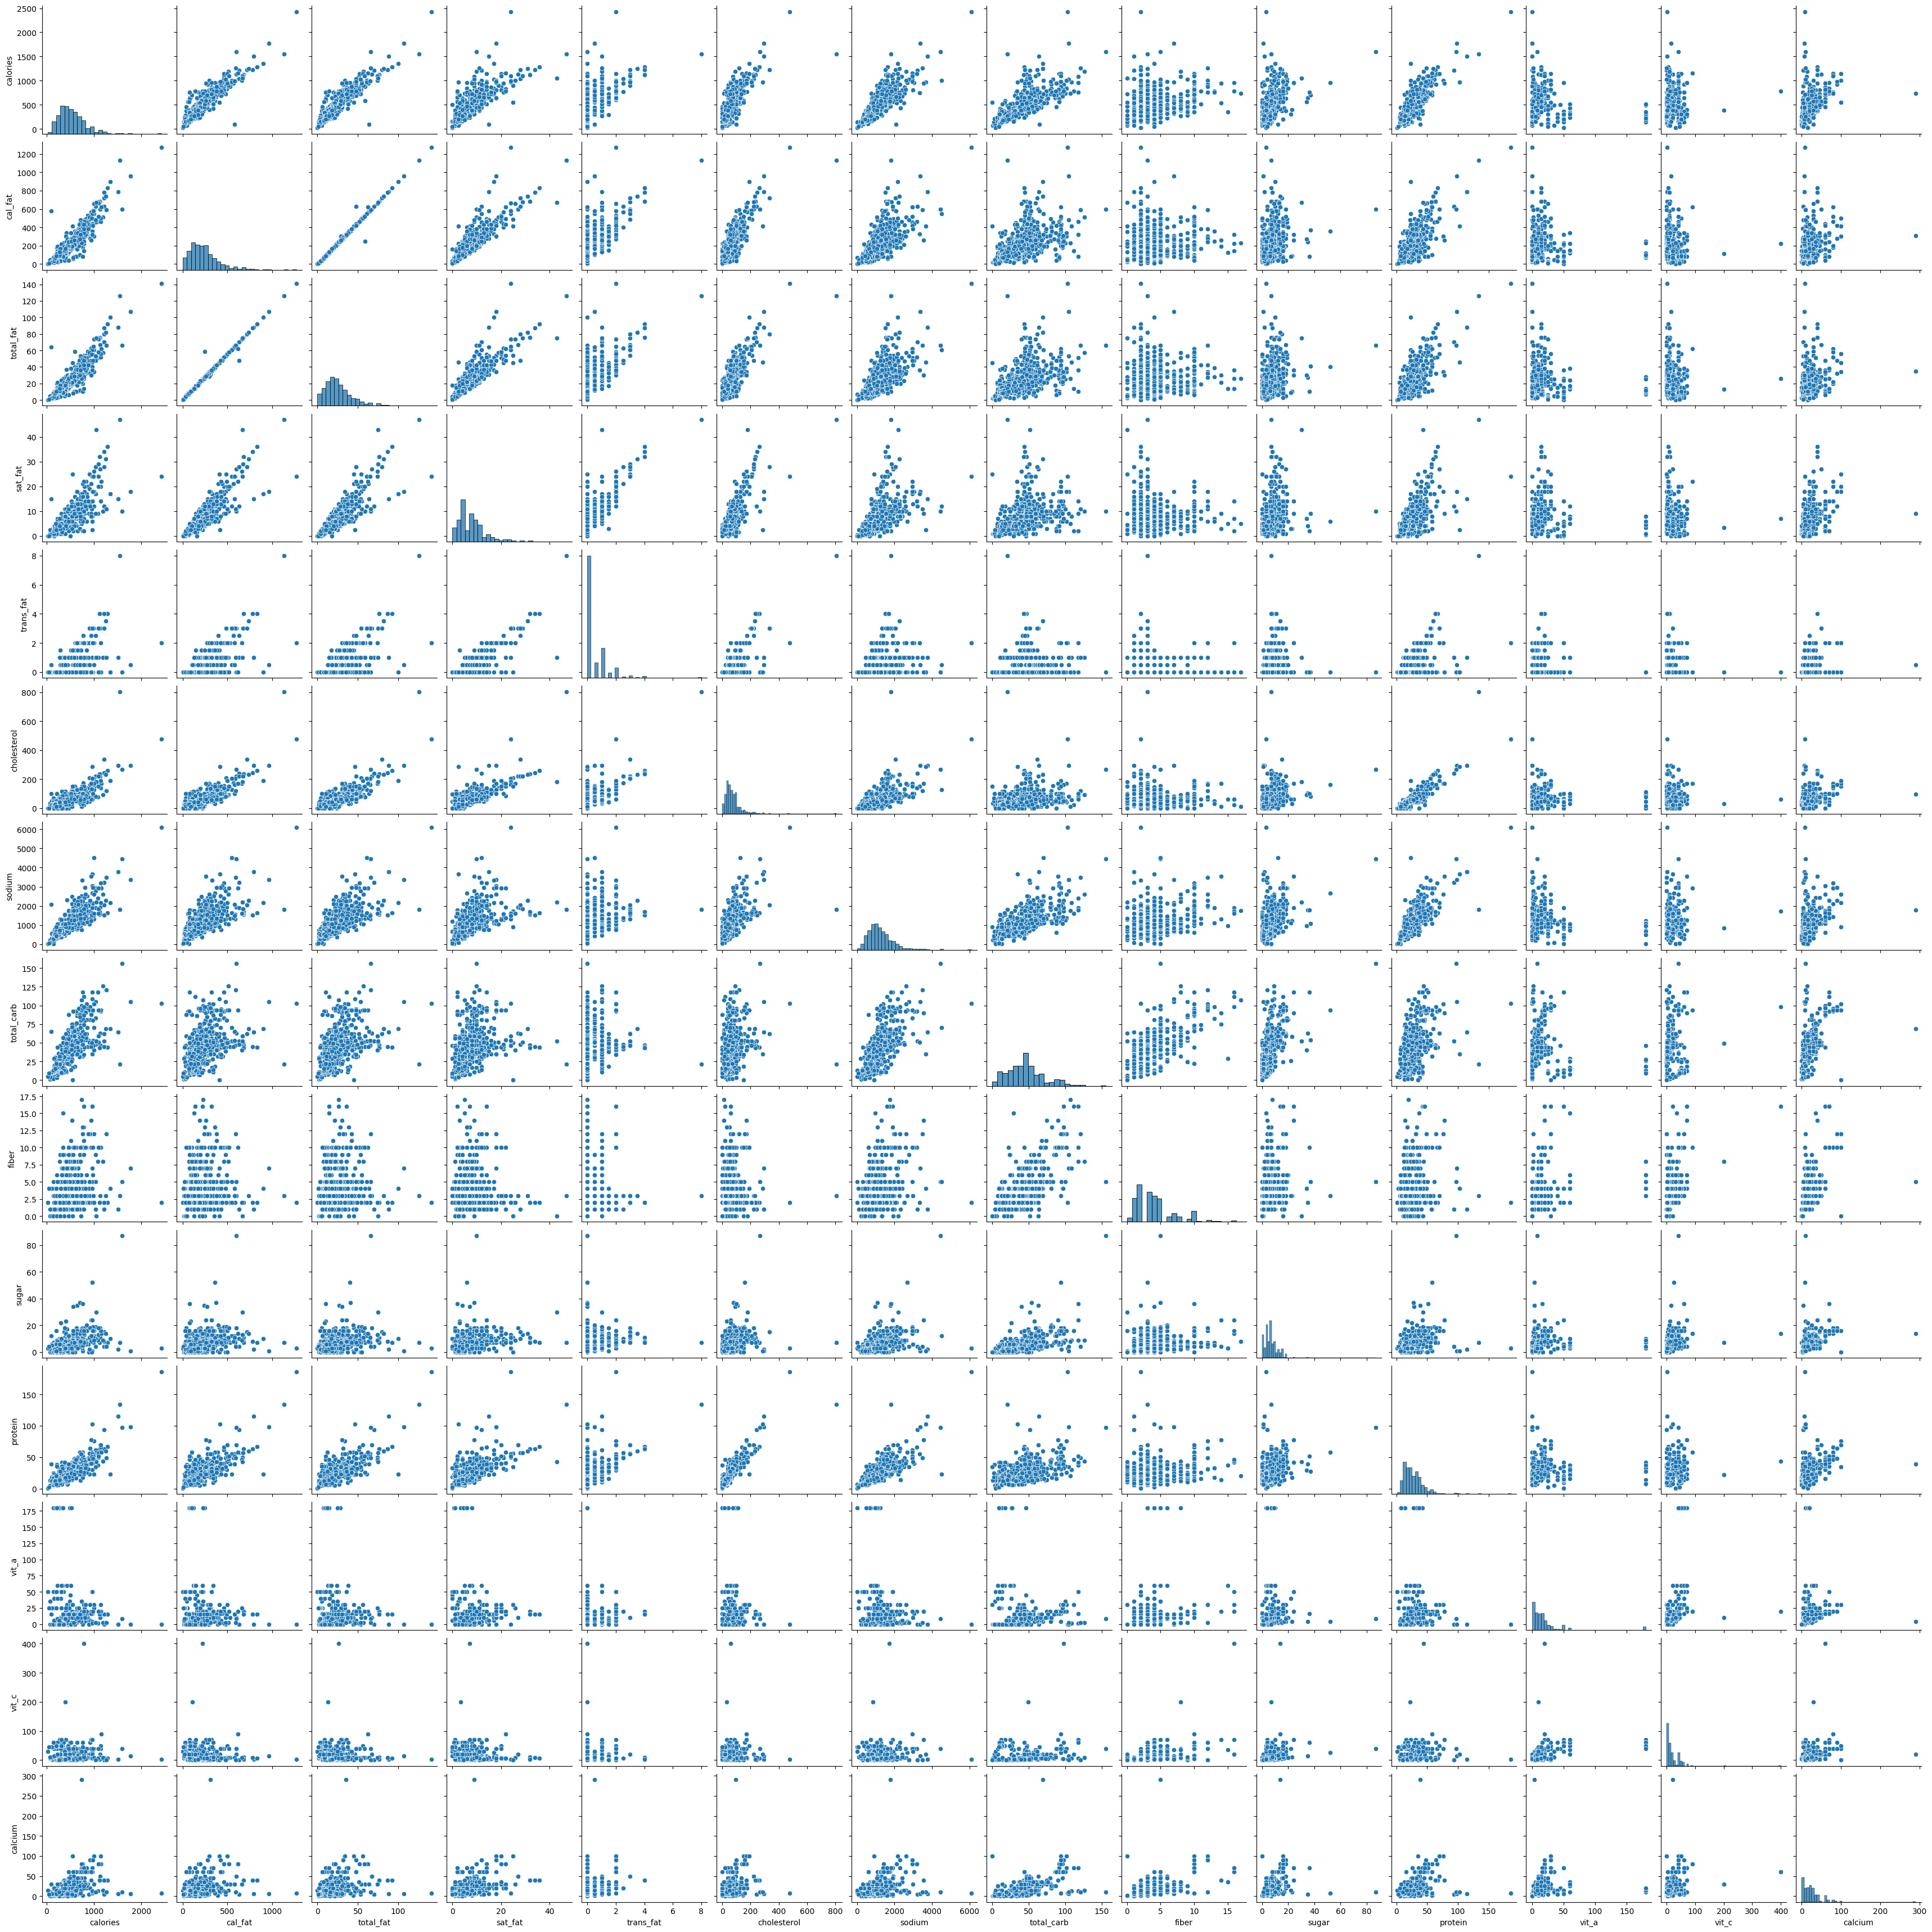

In [73]:
# This Can be further demonstrated by the pairplot

plt.figure(figsize=(10,5))
sns.pairplot(df)

# **TRAINING**

mengelompokkan data berdasarkan kolom 'restaurant' dan menghitung rata-rata (mean) dari setiap atribut numerik untuk setiap kelompok restoran. Hasilnya kemudian diurutkan berdasarkan nilai kolom 'calories' secara menurun.



In [63]:
# Mean Attributes by Restaurant
details = df.groupby('restaurant').mean().sort_values(by='calories',ascending=False)

# Highlight the highest and lowest value in each column with red and green background colors, respectively
highlighted = details.style.highlight_max(color='red').highlight_min(color='green')

# Display the highlighted DataFrame
display(highlighted)

<ipython-input-63-5ee32c4bb2d5>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
restaurant,,,,,,,,,,,
Mcdonalds,640.350877,285.614035,31.807018,8.289474,0.464912,109.736842,1437.894737,48.789474,3.228070,11.070175,40.298246
Sonic,631.698113,338.301887,37.641509,11.415094,0.933962,86.981132,1350.754717,47.207547,2.660377,6.528302,29.188679
Burger King,608.571429,333.757143,36.814286,11.150000,0.864286,100.857143,1223.571429,39.314286,2.633882,8.185714,29.984158
Arbys,532.727273,237.836364,26.981818,7.972727,0.418182,70.454545,1515.272727,44.872727,2.709091,7.563636,29.254545
Dairy Queen,520.238095,260.476190,28.857143,10.440476,0.678571,71.547619,1181.785714,38.690476,2.833333,6.357143,24.833333
Subway,503.020833,165.104167,18.479167,6.197917,0.218750,61.302083,1272.968750,54.718750,6.562500,10.093750,30.312500
Taco Bell,443.652174,188.000000,20.895652,6.591304,0.256522,39.043478,1013.913043,46.634783,5.713043,3.704348,17.417391
Chick Fil-A,384.444444,145.370370,16.148148,4.111111,0.037037,79.074074,1151.481481,28.629630,2.454606,4.148148,31.703704


In [64]:
df_num = df.select_dtypes(exclude='object')
df_num.head()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0
2,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0
3,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0
4,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0


imputasi Nilai yang Hilang: Menggunakan SimpleImputer untuk menggantikan nilai yang hilang (NaN) dalam data numerik dengan nilai rata-rata dari setiap kolom.
Penskalaan Fitur: Menggunakan StandardScaler untuk menskalakan fitur-fitur dalam data yang telah diimputasi.
Inisialisasi dan Pelatihan Model KMeans: Membuat objek KMeans dengan dua kluster (n_clusters=2) dan melatih model pada data yang telah diimputasi dan diskalakan.
Prediksi Kelas Kluster: Menggunakan model KMeans untuk memprediksi kluster (0 atau 1) untuk setiap data point.
Mapping ke Kategori Makanan: Membuat pemetaan hasil kluster ke kategori makanan ('Good' atau 'Bad').
Menambahkan Kategori ke DataFrame Asli: Menambahkan kolom 'Category' yang berisi hasil prediksi ke DataFrame asli.
Menampilkan DataFrame Hasil: Menampilkan lima baris pertama dari DataFrame yang telah diperbarui dengan kolom 'Category'.

# **EVALUASI**

In [65]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_num is your numerical data
# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df_num_imputed)

# Initialize the KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model to the standardized data
kmeans.fit(X)

# Predict the clusters for each data point in the standardized data
y_pred = kmeans.predict(X)

# Map the cluster labels to the "Good" or "Bad" food categories
food_categories = {0: 'Good', 1: 'Bad'}
y_pred = [food_categories[label] for label in y_pred]

# Add the predicted food category to the original DataFrame
df['Category'] = y_pred

# Display the first 5 rows of the DataFrame with the predicted food category
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,Category
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,Other,Good
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,Other,Bad
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,Other,Bad
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,Other,Bad
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,Other,Bad


membuat scatter matrix (matriks sebar) dengan bantuan Plotly Express. Scatter matrix adalah plot yang menampilkan scatter plot untuk setiap pasangan variabel dalam satu gambar, dan diagonalnya biasanya berisi distribusi univariat dari setiap variabel.

In [66]:
import plotly.express as px

# Create a scatter matrix with Plotly
fig = px.scatter_matrix(df, dimensions=df_num.columns, color='Category')

# Define the tooltip information
fig.update_traces(diagonal_visible=False)
fig.update_layout(title='Scatter Matrix of Numerical Features', height=1000, width=1000)

# Show the plot
fig.show()
